# Tags exploration and selection 

In this notebook, I'll get closer look at the tags provided. Also, we will select the tags that we will further use for recommendation. 

## Tags overview

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df_tags = pd.read_csv("data/tags.csv")

In [3]:
df_tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [4]:
df_tags["tag_len"] = df_tags["tag_name"].apply(len)

In [5]:
def num_words(tag): 
    tag = tag.replace("-", " ") #remove "-"
    num_words =len(tag.split()) 
    return num_words
df_tags["num_words"] = df_tags["tag_name"].apply(num_words)

In [6]:
df_tags.head()

,tag_id,tag_name,tag_len,num_words
0,0,-,1,0
1,1,--1-,4,1
2,2,--10-,5,1
3,3,--12-,5,1
4,4,--122-,6,1


In [7]:
df_tags.describe()

,tag_id,tag_len,num_words
count,34252.000000,34252.000000,34252.000000
mean,17125.500000,13.149743,2.146473
std,9887.845047,6.111680,1.071366
min,0.000000,1.000000,0.000000
25%,8562.750000,9.000000,1.000000
50%,17125.500000,13.000000,2.000000
75%,25688.250000,17.000000,3.000000
max,34251.000000,35.000000,10.000000


## Distribution of tags over books 

In [9]:
df_bt = pd.read_csv("data/book_tags.csv")

In [10]:
df_bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [11]:
t = pd.read_csv("data/tags.csv")

In [12]:
#merge with tags name
df_bt = df_bt.merge(t, on = 'tag_id', copy=False)
df_bt.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [13]:
b = pd.read_csv("data/books.csv")

In [23]:
#marge with books titles
df_bt = df_bt.merge(b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id', copy=False)

In [24]:
df_bt.head()

,goodreads_book_id,tag_id,count,tag_name,title_x,title_y
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince (Harry ...
3,1,8717,12986,currently-reading,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,young-adult,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince (Harry ...


In [25]:
# df_bt[['goodreads_book_id','tag_id','count']].groupby(['tag_id']).count

In [26]:
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
df_group_tags = df_bt.groupby('tag_id').agg(
    {'goodreads_book_id':'count', 
     'count':'sum', })

In [27]:
df_group_tags.head()

,goodreads_book_id,count
tag_id,,
0,7,24
1,2,6
2,1,3
3,1,3
4,1,3


In [28]:
df_group_tags.describe()

,goodreads_book_id,count
count,34252.000000,3.425200e+04
mean,29.192806,6.097491e+03
std,277.254715,7.627092e+05
min,1.000000,-1.000000e+00
25%,1.000000,3.000000e+00
50%,1.000000,1.000000e+01
75%,5.000000,5.200000e+01
max,9983.000000,1.407188e+08


In [29]:
# Most popular tags
tag_counts = df_bt.groupby('tag_name').tag_name.count().sort_values(ascending = False)
tag_counts.head(10)

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
Name: tag_name, dtype: int64

# Tags selection

In [30]:
# Select tags that are only given to at least two books and at least 5 times 
df_sel = df_group_tags[df_group_tags["goodreads_book_id"]>=2]
df_sel 

,goodreads_book_id,count
tag_id,,
0,7,24
1,2,6
15,2,6
21,2,19
22,3,27
...,...,...
34239,5,31
34241,5,31
34242,16,64


In [31]:
df_sel= df_sel[df_sel["count"]>=5]
df_sel

,goodreads_book_id,count
tag_id,,
0,7,24
1,2,6
15,2,6
21,2,19
22,3,27
...,...,...
34239,5,31
34241,5,31
34242,16,64


In [32]:
df_sel_tags = df_sel.merge(t, on = 'tag_id', copy=False, how='inner')
df_sel_tags.head()

,tag_id,goodreads_book_id,count,tag_name
0,0,7,24,-
1,1,2,6,--1-
2,15,2,6,--6-
3,21,2,19,-calif--
4,22,3,27,-d-c--


In [33]:
df_sel_tags.rename(columns={"goodreads_book_id": "book_count"}, inplace=True)

In [34]:
df_sel_tags.sort_values("tag_id", inplace=True)

In [35]:
df_sel_tags.head()

,tag_id,book_count,count,tag_name
0,0,7,24,-
1,1,2,6,--1-
2,15,2,6,--6-
3,21,2,19,-calif--
4,22,3,27,-d-c--


In [36]:
df_sel_tags.to_csv('data/tags_selected.csv', index=False)

In [37]:
# TODO delete the following cells 

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
sns.distplot(tag_counts_array)

ModuleNotFoundError: No module named 'seaborn'

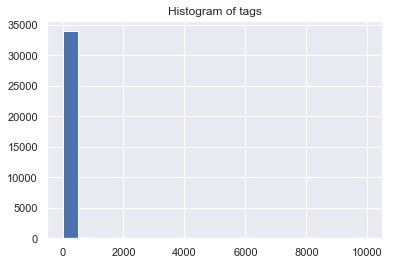

In [23]:
import matplotlib.pyplot as plt
_ = plt.hist(tag_counts_array, bins=20)  # arguments are passed to np.histogram
plt.title("Histogram of tags")
plt.show()

https://www.youtube.com/watch?v=2I2E1ZbF8pg - about aggregation in python 
https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ 
https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/ 

In [72]:
np.histogram(tag_counts, bins=10)

(array([34066,    92,    38,    15,    14,     5,     5,     5,     4,
            8], dtype=int64),
 array([1.0000e+00, 9.9920e+02, 1.9974e+03, 2.9956e+03, 3.9938e+03,
        4.9920e+03, 5.9902e+03, 6.9884e+03, 7.9866e+03, 8.9848e+03,
        9.9830e+03]))